In [2]:
%pip install h5py > None
%pip install scikit_learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


dimension of x: (100, 2)
dimension of y: (100, 1)
(2, 1)
(1,)
(2, 1)


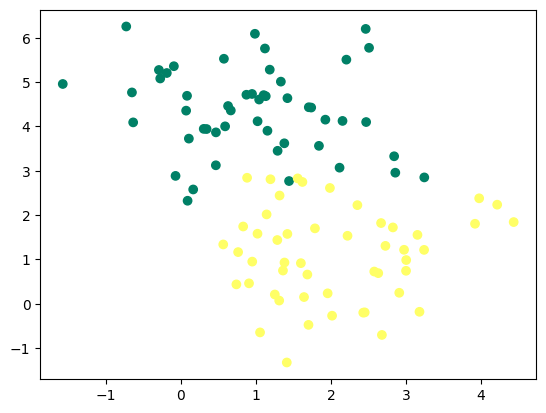

In [3]:
# @title Import dependancies
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from utilities import load_data
from tqdm import tqdm
# @title Create dataset with 100 datas and 2 variable
x,y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
# x,y = make_circles(n_samples=100, noise=0.1 , factor=0.3, random_state=0)
y = y.reshape((y.shape[0], 1))

# displays x and y dimensions
print("dimension of x:", x.shape)
print("dimension of y:", y.shape)

plt.scatter(x[:,0], x[:,1], c=y, cmap="summer")
# @title createt initialization function

def initialization(X):
  """
  ceci nous donnera un vecteur W (2,1 ) car l'idée c'est d'avoir un vecteur
  w qui contient autant de parametre qu'il y'a de variable
  """
  W = np.random.randn(X.shape[1], 1)

  """ pour le parametre b(biais) nous lui passons un nombre réel
  car la fonction d'initialisation est z = w1x1 + w2x2 + b
  """
  b = np.random.randn(1)

  return (W, b)

# test
W, b = initialization(x)
print(W.shape)
print(b.shape)
# @title implement our model function
def model(X, W, b):
  """
    the first things we are doing is build Z function (Z= XW + b)
    then we are compute activation function A = 1 / 1 + e(-Z)
  """
  Z = X.dot(W) + b
  A = 1 / (1 + np.exp(-Z))

  return A

A = model(x, W, b)
A.shape
# @title implement the Log Loss function(fonction coût)

def log_loss(A, y):
  """
    in theorie L = -1/m sum(log(ai)*yi + (1-yi)*log(1-ai))
    m = number of data in our dataset then m = len(y)
  """
  epsilon = 1e-15
  return  1 / len(y) * np.sum(-y * np.log(A + epsilon) - (1 - y)*np.log(1 - A + epsilon))

  # this function return a real number which measure of error our model
# test
log_loss(A, y)
# @title Create Gradient function

def gradients(A, x, y):
  """
    we have two gradients the jacobien that we note dW and db( derivative of
    log_loss function with respect to b)
    dW = 1/m * trans(X).(A-Y)
    db = 1 /m * sum(A-Y)
  """
  dW = 1 / len(y) * np.dot(x.T, A-y)
  db = 1 / len(y) * np.sum(A - y)
  return (dW, db)
# test
dw,db= gradients(A, x, y)
print(dw.shape)
db
# @title build the update function

"""
this function take as input the gradients, W, b and learning rate
"""
def update(dW, db, W, b, learning_rate):
  # nous allons implementer l'agorithme de la descencte de gradient
  """
  wi = wi - a(dl/dwi)  a= learning rate and (dl/dwi) = dW
  bi = bi - a(dl/dbi)  (dl/dbi) = db
  """
  W = W - learning_rate * dW
  b = b - learning_rate * db

  return (W, b)

# test
W, b = update(dw, db, W, b, 2)
W
# @title create a prediction function

def predict(X, W, b):
  # computer the output of the model (activation)
  A = model(X, W, b)
  return A >= 0.5
from sklearn.metrics import accuracy_score
# @title build our Artificial neural

"""
  cette fonction va prendre en entré nos données x et y , un pas d'apprentissage
  pour notre fonction de mise a jour et nombre d'iteration pour notre algo
  d'apprentissage
"""
def artificial_neuron(X_train, y_train, X_test, y_test, learning_rate=0.5, n_iter=100):
  # initialization of parameter w and b
  W,b = initialization(X_train)

  train_loss = []
  train_acc = [] 
  test_loss = []
  test_acc = []
  # create learning loop
  for i in tqdm(range(n_iter)):
    # launch result of our model
    A = model(X_train, W, b)
    
    # compute the preddiction of all data x in tain
    if i % 10 == 0:
      # tain
      train_loss.append(log_loss(A, y_train))
      y_pred = predict(X_train,W, b)
      train_acc.append(accuracy_score(y_train, y_pred))

      # test
      A_test = model(X_test, W, b)
      test_loss.append(log_loss(A_test, y_test))
      y_pred = predict(X_test,W, b)
      test_acc.append(accuracy_score(y_test, y_pred))
  
      
    # update
    dW,db = gradients(A, X_train, y_train)
    W, b = update(dW,db, W, b, learning_rate)

  print(train_acc, test_acc)
  plt.figure(figsize=(12, 4))
  plt.subplot(1, 3, 1)
  plt.plot(train_loss, label="Train Loss")
  plt.plot(test_loss, label="Test Loss")
  plt.legend()
  
  plt.subplot(1, 3, 2)
  plt.plot(train_acc, label="Train accuracy")
  plt.plot(test_acc, label="Test accuracy")
  plt.legend()

  # then return W and b parameter which model learned
  return (W, b)

In [4]:
# @title Entrainement
x_train, y_train, x_test, y_test = load_data()

In [5]:
print(x_train.shape)
print(y_train.shape)
print(np.unique(y_train, return_counts=True))

(1000, 64, 64)
(1000, 1)
(array([0., 1.]), array([500, 500]))


/home/jeanpetit/Bureau/Project/AI/deep-learning/venv/lib/python3.8/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/tmp/ipykernel_8769/2901901481.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


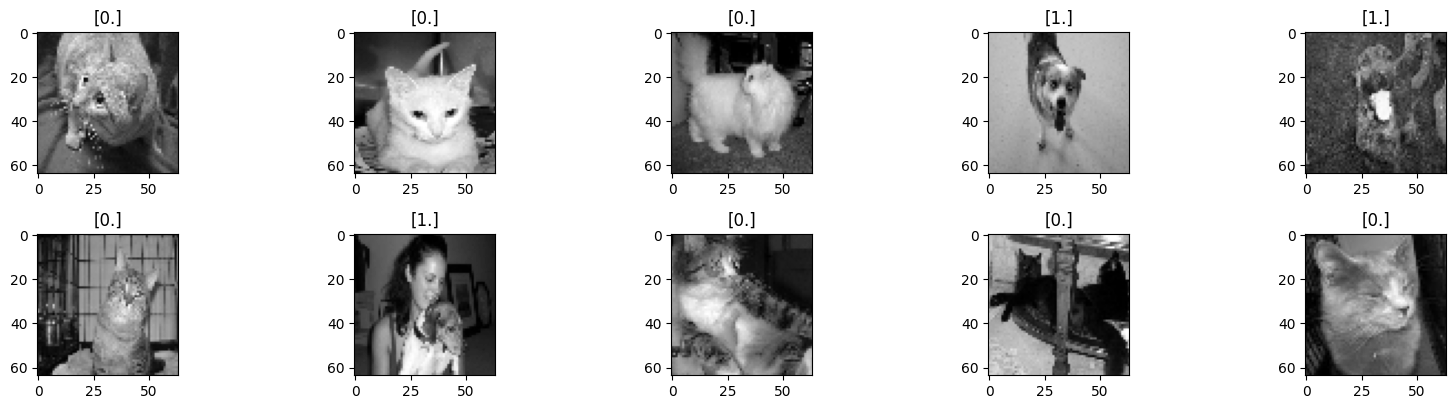

In [6]:
plt.figure(figsize=(16, 8))

for i in range(1, 11):
    plt.subplot(4, 5, i)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()

## Model Training

### Reshape dimension of image in datasets an Normalize it
each image size of in datasets is 64X64 pixel then our model that we trained take as input a table at 2 dimensions then we have a x_train table at 3 dimensions

In [7]:
x_train_reshape = x_train.reshape(x_train.shape[0], -1) / x_train.max()
x_train.max(), x_train_reshape.shape

(254, (1000, 4096))

In [8]:
x_train_reshape.max()

1.0

In [9]:
x_test_reshape = x_test.reshape(x_test.shape[0], -1) / x_train.max()
x_test_reshape.shape, x_test_reshape.max()

((200, 4096), 1.0)

  4%|▍         | 38/1000 [00:00<00:16, 58.12it/s]

100%|██████████| 1000/1000 [00:14<00:00, 68.39it/s]


[0.515, 0.523, 0.527, 0.527, 0.529, 0.526, 0.524, 0.527, 0.527, 0.527, 0.524, 0.523, 0.522, 0.522, 0.523, 0.524, 0.525, 0.522, 0.521, 0.521, 0.524, 0.525, 0.524, 0.527, 0.525, 0.525, 0.527, 0.527, 0.528, 0.527, 0.527, 0.533, 0.534, 0.534, 0.536, 0.536, 0.536, 0.535, 0.535, 0.536, 0.536, 0.537, 0.538, 0.538, 0.541, 0.539, 0.538, 0.537, 0.538, 0.541, 0.54, 0.54, 0.541, 0.542, 0.543, 0.544, 0.546, 0.548, 0.55, 0.547, 0.548, 0.55, 0.551, 0.551, 0.552, 0.551, 0.551, 0.551, 0.551, 0.551, 0.552, 0.552, 0.551, 0.552, 0.552, 0.554, 0.555, 0.555, 0.553, 0.555, 0.554, 0.555, 0.555, 0.555, 0.557, 0.556, 0.555, 0.557, 0.557, 0.557, 0.556, 0.558, 0.559, 0.562, 0.562, 0.562, 0.563, 0.562, 0.562, 0.562] [0.445, 0.415, 0.42, 0.425, 0.425, 0.435, 0.445, 0.435, 0.44, 0.425, 0.42, 0.425, 0.425, 0.425, 0.425, 0.425, 0.425, 0.425, 0.425, 0.44, 0.445, 0.445, 0.445, 0.445, 0.45, 0.45, 0.45, 0.45, 0.45, 0.455, 0.45, 0.445, 0.45, 0.45, 0.445, 0.44, 0.44, 0.445, 0.44, 0.435, 0.435, 0.435, 0.435, 0.44, 0.44, 0.44

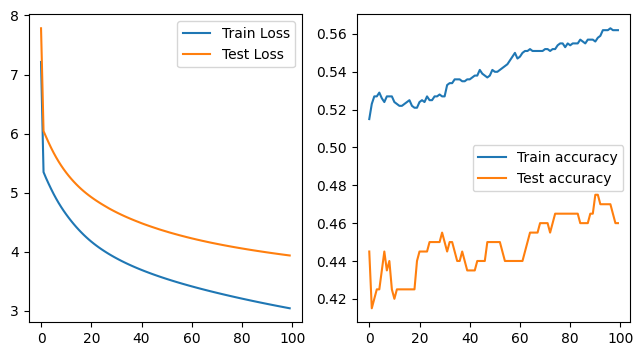

In [10]:
W,b = artificial_neuron(x_train_reshape, y_train, x_test_reshape, y_test, learning_rate=0.01, n_iter=1000)

## Application